In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
import inspect
import numpy as np
import genpom
from genpom import Camera, generate_rectangles, POM, Cilinder, Rectangle

import imageio

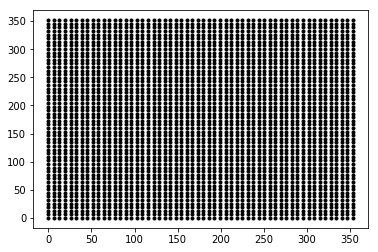

In [2]:
WIDTH = 360
HEIGHT = 358
NB_WIDTH = 56
NB_HEIGHT = 56
MAN_RAY = 10
MAN_HEIGHT = 180
REDUCTION = 1
ORIGINE_X = 0.0
ORIGINE_Y = 0.0

world_grid = []
for i in range(NB_HEIGHT):
    for j in range(NB_WIDTH):
        step_width = WIDTH/NB_WIDTH
        step_height = HEIGHT/NB_HEIGHT
        world_grid.append([ORIGINE_X + j*step_width,
                           ORIGINE_Y + i*step_height,
                           0])   
world_grid = np.array(world_grid) 

plt.figure()
plt.plot(world_grid[:,0], world_grid[:,1], 'k.')

# Testing projection using H_ground and H_head

In [13]:
H_ground0 = np.array([[0.176138, 0.647589, -63.412272],
                      [-0.180912, 0.622446, -0.125533],
                      [-0.000002, 0.001756, 0.102316]])

H_head0 = np.array([[0.053299, 1.247713, 13.803214],
                   [-0.092242, 1.196431, 38.620552],
                   [-0.000080, 0.003919, 0.164282]])

cam0 = Camera(H_ground = np.linalg.inv(H_ground0), 
              H_head = np.linalg.inv(H_head0))

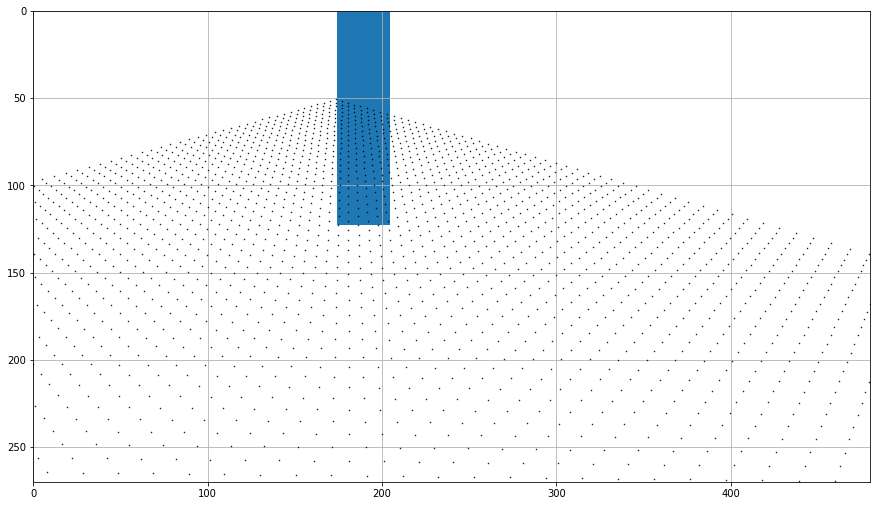

In [27]:
import matplotlib.patches as patches

image_points = cam0.project_bottom_points(world_grid)

cil = Cilinder(MAN_RAY, MAN_HEIGHT, world_grid[1200])
rect = Rectangle(0, 0, *cil.project(cam0))

fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(111, aspect='equal')

xmin = rect.xmin
ymin = rect.ymin
xmax = rect.xmax
ymax = rect.ymax

ax1.add_patch(
    patches.Rectangle(
        (xmin, ymin), # (x,y)
        xmax-xmin,    # width
        ymax-ymin,    # height
    )
)
ax1.plot(image_points[:,0], image_points[:,1], 'k.', markersize=1)
ax1.axis([0, 480, 270, 0])
ax1.grid()

# Testing projection using H_ground and head_height
### Note: the position of the rectangle is difference because we are using two different cameras

In [29]:
H_ground2 = np.array([[-0.118791, 0.077787, 64.819189],
                      [0.133127, 0.069884, 15.832922],
                      [-0.000001, 0.002045, -0.057759]])

head_plane_percentage = 0
image_height = 270
# head_height has to be in pixels starting from the the top of the image

cam2 = Camera(H_ground = np.linalg.inv(H_ground2), 
              head_height = int(head_plane_percentage*image_height))

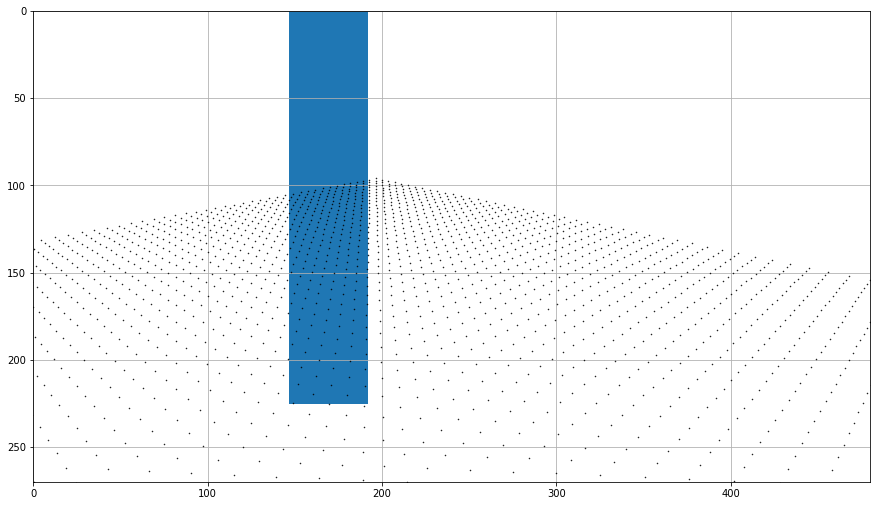

In [28]:
import matplotlib.patches as patches

image_points = cam2.project_bottom_points(world_grid)

cil = Cilinder(MAN_RAY, MAN_HEIGHT, world_grid[1200])
rect = Rectangle(0, 0, *cil.project(cam2))

fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(111, aspect='equal')

xmin = rect.xmin
ymin = rect.ymin
xmax = rect.xmax
ymax = rect.ymax

ax1.add_patch(
    patches.Rectangle(
        (xmin, ymin), # (x,y)
        xmax-xmin,    # width
        ymax-ymin,    # height
    )
)
ax1.plot(image_points[:,0], image_points[:,1], 'k.', markersize=1)
ax1.axis([0, 480, 270, 0])
ax1.grid()